# 随机森林

## 1.导入需要的包

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

## 2.导入需要的数据集

In [3]:
wine = load_wine()

In [4]:
wine.data.shape

(178, 13)

In [5]:
wine.target.shape

(178,)

## 3.建模基本流程(留出法)

In [6]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

print("Single Tree:{}\n".format(score_c)
     ,"Random Tree:{}".format(score_r)
     )

Single Tree:0.9074074074074074
 Random Tree:1.0


## 4.随机森林和决策树对比（交叉验证）

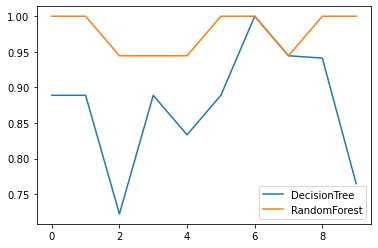

In [7]:
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

rfc = RandomForestClassifier(n_estimators = 25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(10),clf_s,label="DecisionTree")
plt.plot(range(10),rfc_s,label="RandomForest")

plt.legend()
plt.show()

## 5.随机森林和决策树对比（交叉验证）十组

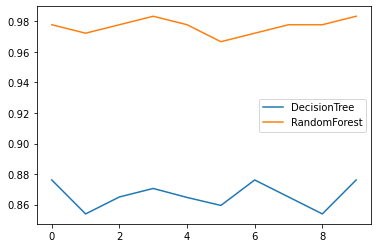

In [8]:
clf_l = []
rfc_l = []

for i in range(10):
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
    rfc = RandomForestClassifier()
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
plt.plot(range(10),clf_l,label="DecisionTree")
plt.plot(range(10),rfc_l,label="RandomForest")

plt.legend()
plt.show()

## 6.n_estimators的学习曲线（树的数量）

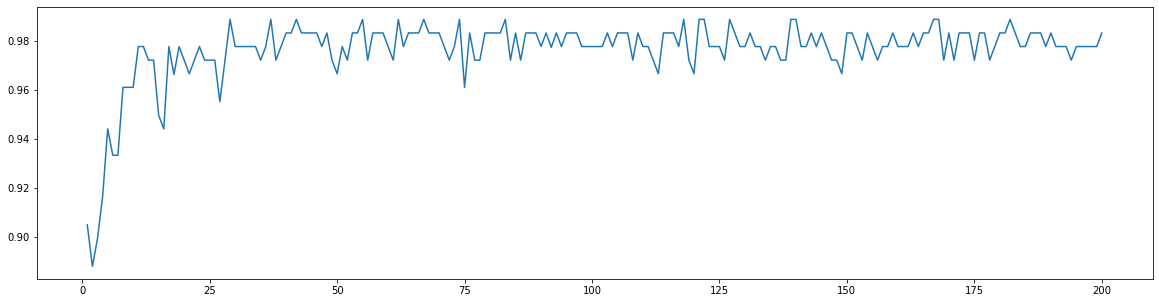

In [10]:
superpa = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
    
# print(max(superpa),superpa.index(superpa))

plt.figure(figsize = [20,5])

plt.plot(range(1,201),superpa)

plt.show()

## 7.接口estimators_-->查看随机森林中每棵树的情况

In [11]:
# 随机森林的random_state固定的是这个森林，而非森林里的树
rfc = RandomForestClassifier(n_estimators = 20, random_state = 2)
rfc = rfc.fit(Xtrain, Ytrain)

# 查看每棵树的情况--》可以看到每棵树的random_state都不同
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [12]:
# 打印每棵树的随机值
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


## 8.接口bootstrap&oob_score

In [13]:
# bootstrap-->有放回随机抽样（默认为TRUE，不用写）
# oob_score-->默认值为FALSE，设为TRUE是，可用袋外数据测试训练结果

rfc = RandomForestClassifier(n_estimators = 25, oob_score = True)
rfc = rfc.fit(wine.data, wine.target)

rfc.oob_score_

0.9719101123595506

## 9.接口feature_importances_

In [15]:
# 查看每个特征的重要性

rfc = RandomForestClassifier(n_estimators = 25)
rfc = rfc.fit(Xtrain,Ytrain)

rfc.feature_importances_

array([0.13905407, 0.01739733, 0.02741336, 0.0116506 , 0.04239181,
       0.11505227, 0.07647602, 0.00835979, 0.00730362, 0.20354559,
       0.0820296 , 0.13303196, 0.13629398])

## 10.接口apply

In [17]:
# 返回每个样本在书中的哪个叶子节点的索引-->每一行代表一棵树（随机森林多棵树）
rfc.apply(Xtest)

array([[ 3,  4,  2, ...,  2,  2,  7],
       [ 3,  4,  8, ..., 11,  7, 12],
       [ 8,  3, 10, ...,  8,  9, 11],
       ...,
       [ 3,  4,  2, ...,  2,  7, 15],
       [ 3,  4,  2, ...,  2,  7,  7],
       [ 9,  4, 10, ...,  8,  9,  3]], dtype=int64)

## 11.接口predict

In [18]:
# predict返回模型预测的数据的标签（与原数据集里的标签不一定相同）
rfc.predict(Xtest)

array([1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 2])

## 12.接口predict_proba

In [19]:
# 返回每个测试样本对应的被分到每一类的概率

rfc.predict_proba(Xtest)

array([[0.  , 1.  , 0.  ],
       [0.2 , 0.76, 0.04],
       [0.  , 0.12, 0.88],
       [0.  , 0.04, 0.96],
       [0.04, 0.32, 0.64],
       [0.04, 0.04, 0.92],
       [0.6 , 0.36, 0.04],
       [0.72, 0.28, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.16, 0.84],
       [0.08, 0.84, 0.08],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.16, 0.8 , 0.04],
       [0.  , 0.16, 0.84],
       [0.96, 0.  , 0.04],
       [0.2 , 0.56, 0.24],
       [0.  , 1.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.96, 0.04, 0.  ],
       [0.8 , 0.2 , 0.  ],
       [0.04, 0.28, 0.68],
       [1.  , 0.  , 0.  ],
       [0.04, 0.04, 0.92],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.92, 0.04, 0.04],
       [0.  , 0.2 , 0.8 ],
       [0.96, 0.  , 0.04],
       [0.  , 0.24, 0.76],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
 